#Importing things we need

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Importing the MNIST dataset

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
y_train.shape

(60000,)

In [24]:
y_train[0]

np.uint8(5)

#Normalizing the dataset, Flattening the vectors for one dimension, as well as labels


In [25]:
X_train=X_train/255
X_test=X_test/255

In [26]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [27]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

In [28]:
X_test.shape

(10000, 784)

#Creating the models structure
Layer 1:256 neurons, normalized, then passed onto LeakyRelu for activation
* Layer 2: 124 neurons, normalized, then passed onto Relu for activation
* Layer 3: 64 neurons, normalized, then passed onto LeakyRelu for activation
* Layer 4: 32 neurons, normalized, then passed onto Relu for activation
* Layer 5: 10 neurons, then passed onto softmax for activation & this is the final layer



In [29]:
model=models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.05),
    layers.Dropout(0.3), # Added Dropout layer

    layers.Dense(124),
    layers.BatchNormalization(),
    layers.ReLU(),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.05),

    layers.Dense(32),
    layers.BatchNormalization(),
    layers.ReLU(),

    layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 124)            │        31,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 124)            │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,142 (957.59 KB)

 Trainable params: 244,190 (953.87 KB)

 Non-trainable params: 952 (3.72 KB)

#Training the model

In [32]:
models_history=model.fit(x=X_train, y=y_train, batch_size=64, epochs=10, validation_split=0.25)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7953 - loss: 0.7243 - val_accuracy: 0.9533 - val_loss: 0.1538
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9472 - loss: 0.1792 - val_accuracy: 0.9688 - val_loss: 0.1063
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9582 - loss: 0.1364 - val_accuracy: 0.9683 - val_loss: 0.1057
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1147 - val_accuracy: 0.9727 - val_loss: 0.0880
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9673 - loss: 0.1045 - val_accuracy: 0.9725 - val_loss: 0.0923
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9732 - loss: 0.0837 - val_accuracy: 0.9742 - val_loss: 0.0897
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9693 - loss: 0.0932 - val_accuracy: 0.9759 - val_loss: 0.0841
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0777 - val_accuracy: 0

#Models performence on various matrices

In [33]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.0873
Test Accuracy: 97.75%


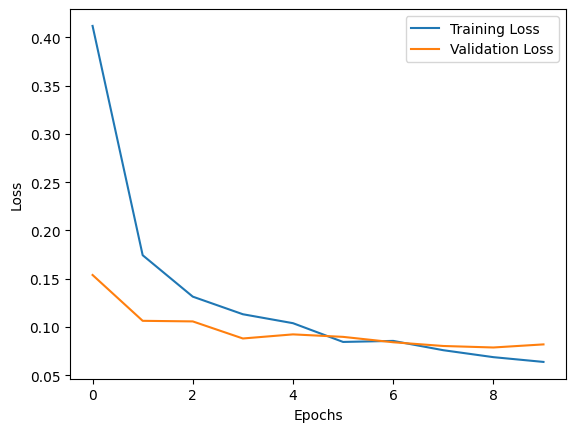

In [34]:
plt.plot(models_history.history['loss'], label='Training Loss')
plt.plot(models_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

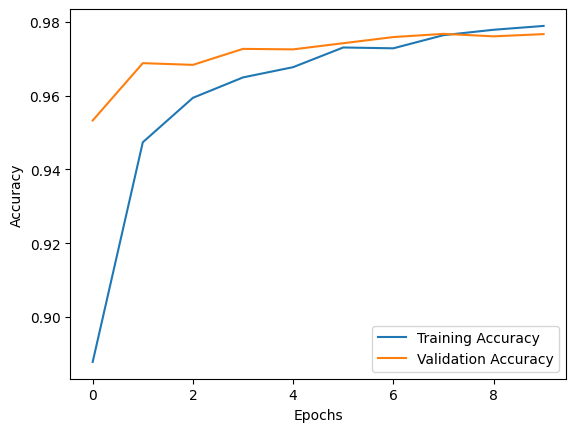

In [35]:
plt.plot(models_history.history['accuracy'], label='Training Accuracy')
plt.plot(models_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



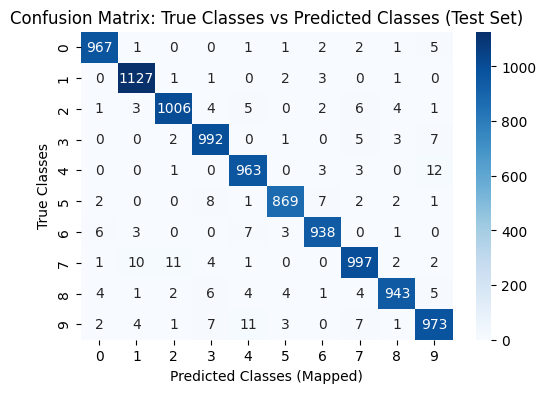

In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))
cm_of_model=confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_of_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Classes (Mapped)')
plt.ylabel('True Classes')
plt.title('Confusion Matrix: True Classes vs Predicted Classes (Test Set)')
plt.show()